# 数据预处理sklearn.preprocessing 的几个模块

方法来自[这里](https://blog.csdn.net/weixin_40807247/article/details/82793220)

In [5]:

import pandas as pd
from path import Path

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


root = Path('F:/datasets/kaggle/House')
df_train = pd.read_csv(root/'train.csv')
print(df_train.columns)

y_np = df_train['SalePrice'].values#return np(1460,) order 1 tensor

y_np_reshaped = y_np.reshape(-1,1)# 貌似所有PreProcessing都得用[n,1]的shape,order2 tensor

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## 标准化 

F:\workpgs\anaconda\envs\pyt\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
F:\workpgs\anaconda\envs\pyt\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


count    1.460000e+03
mean     1.362685e-16
std      1.000343e+00
min     -1.838704e+00
25%     -6.415162e-01
50%     -2.256643e-01
75%      4.165294e-01
max      7.228819e+00
dtype: float64
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
dtype: float64


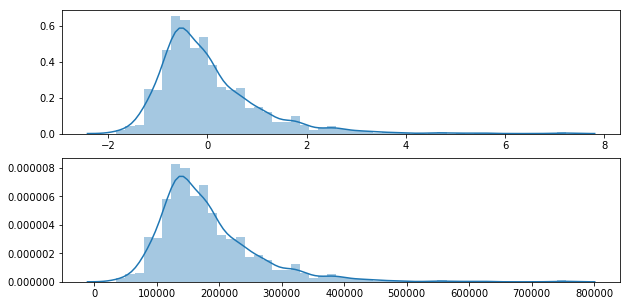

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(y_np_reshaped)
y_scale_1 = scaler.transform(y_np_reshaped)# 可以顺便记录变换的过程(scaler)
y_inversed = scaler.inverse_transform(y_scale_1)#基本就是y_np_reshaped

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,5))
sns.distplot(y_scale_1,ax=ax1)
sns.distplot(y_inversed,ax=ax2)

print(pd.Series(y_scale_1.squeeze(1)).describe())
print(pd.Series(y_inversed.squeeze(1)).describe())#对numpy->series

## 常规方法标准化

In [10]:
from sklearn.preprocessing import scale
y_scale_0 = scale(y_np_reshaped)# 最朴素的, 直接一个函数变换
y_scale_2 = StandardScaler().fit_transform(y_np_reshaped)# 效果和0号一样



y_scaled = pd.Series(y_scale_0.squeeze(1))#(1460,1)->(1460,)
#sale_price = preprocessing.StandardScaler().fit_transform(sale_price.values)

print(pd.Series(y_scaled).describe())


count    1.460000e+03
mean     1.362685e-16
std      1.000343e+00
min     -1.838704e+00
25%     -6.415162e-01
50%     -2.256643e-01
75%      4.165294e-01
max      7.228819e+00
dtype: float64


F:\workpgs\anaconda\envs\pyt\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
F:\workpgs\anaconda\envs\pyt\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
F:\workpgs\anaconda\envs\pyt\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [ ]:
## 正则化
from sklearn.preprocessing import normalize

y_norm = normalize(y_np_reshaped,norm='l2')

sns.distplot(y_norm)
pd.Series(y_norm.squeeze(1)).describe()

## 独热编码

In [ ]:

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit([[0, 0, 3],
         [1, 1, 0],
         [0, 2, 1],
         [1, 0, 2]])    # fit来学习编码

enc.transform([[0, 0, 0]]).toarray()# 进行编码

enc.fit([['B',1,'MALE'],
         ['B',0,'FEMALE'],
         ['C',2,'FEMALE'],
         ['A',0,'MALE']])


In [ ]:
print(enc.transform([['A', 0, 'MALE']]).toarray())#独热编码还是从首位ascll码值开始排列的，reutrun a tuple
y1 = enc.transform([['A', 0, 'MALE']]).toarray()[:,:enc.n_values_[0]+1]# 进行编码
y2 = enc.transform([['A', 0, 'MALE']]).toarray()[:,enc.n_values_[0]:enc.n_values_[1]+1]# 进行编码
y3 = enc.transform([['A', 0, 'MALE']]).toarray()[:,enc.n_values_[1]:enc.n_values_[2]+1]# 进行编码

print(y1,y2,y3)


#print(enc.categories_)# 各个特征的变量空间
#print(enc.n_values_)# 各个特征的变量空间大小


## 空值补齐

In [11]:
# 5 弥补缺失数据
# 在scikit-learn的模型中都是假设输入的数据是数值型的，并且都是有意义的，如果有缺失数据是通过NAN，或者空值表示的话，就无法识别与计算了。
# 要弥补缺失值，可以使用均值，中位数，众数等等。Imputer这个类可以实现。请看：
import numpy as np
from sklearn.preprocessing import Imputer
 
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)#通过均值补齐axis=0 的Nan值
data = [[1, 2],
        [np.nan, 3],
        [7, 6]]
imp.fit(data)

F:\workpgs\anaconda\envs\pyt\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [12]:
x = [[np.nan, 2], [6, np.nan], [7, 6]]
x_ = imp.transform(x)

array([[4.        , 2.        ],
       [6.        , 3.66666667],
       [7.        , 6.        ]])

In [7]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 
X,y = load_digits(return_X_y=True)


In [9]:

X.shape()
#plt.gray() 
#plt.matshow(X.images[0]) 
#plt.show() 

TypeError: 'tuple' object is not callable